# **Titanic Passengers Survavibility**

Create a model that predicts which passengers survived the Titanic shipwreck.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
titanic_data = pd.read_csv('/content/drive/My Drive/My Mini Projects/Kaggle - Titanic/train.csv')
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## **Data Exploration**

In [5]:
titanic_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
#lihat ukuran dataframe
titanic_data.shape

(891, 12)

### **Melihat nilai-nilai unik atribut**

In [10]:
titanic_data.groupby('Pclass').size()

Pclass
1    216
2    184
3    491
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


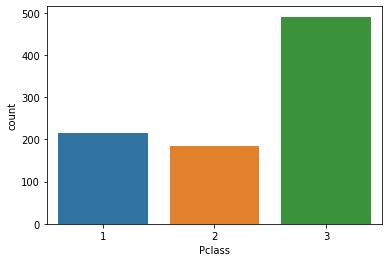

In [12]:
#grafik visualisasi untuk Pclass
sns.countplot(titanic_data.Pclass,label='Count')
plt.show()

In [13]:
titanic_data.groupby('Sex').size()

Sex
female    314
male      577
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


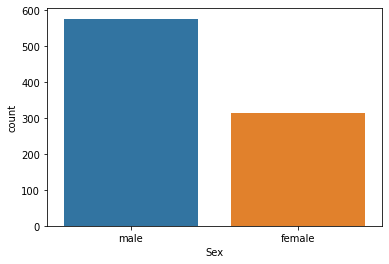

In [14]:
sns.countplot(titanic_data.Sex,label='count')
plt.show()

In [15]:
titanic_data.groupby('Embarked').size()

Embarked
C    168
Q     77
S    644
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


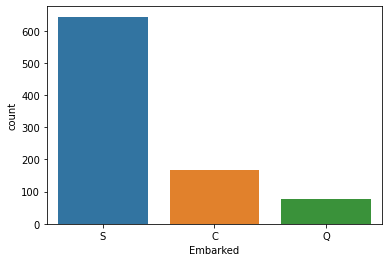

In [16]:
sns.countplot(titanic_data.Embarked,label='count')
plt.show()

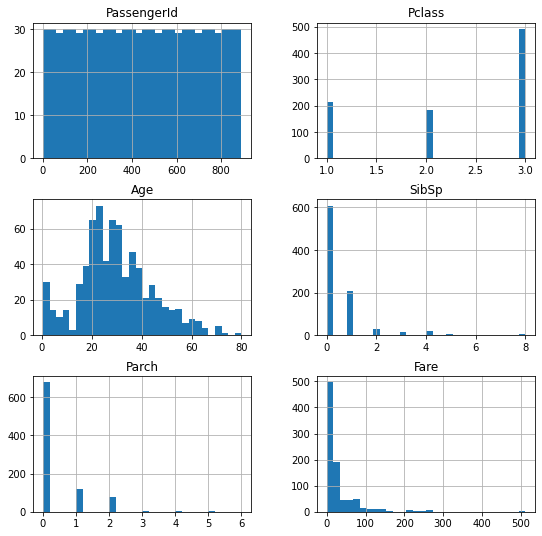

In [17]:
#melihat sebaran data, apakah ada yang terdistribusi normal?

titanic_data.drop('Survived',axis=1).hist(bins=30,figsize=(9,9))
plt.show()

## **Preprocessing/Cleaning**

### **Handling Missing Values**

In [18]:
#cek atribut, apakah ada data null?

titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [19]:
#mengisi nilai-nilai null

titanic_data.Age.fillna(titanic_data.Age.mean(),inplace=True)
titanic_data.Cabin.fillna('No Cabin', inplace=True)
titanic_data.Embarked.fillna('S', inplace=True) #kelas dominan

titanic_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [20]:
#cek tipe data
titanic_data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

### **Mapping Sex & Embarked Attributes**

In [23]:
#sex
map_sex={'female':0,'male':1}
titanic_data['Sex'] = titanic_data['Sex'].map(map_sex)

In [24]:
#embarked
map_emb={'S':0,'C':1,'Q':2}
titanic_data['Embarked']=titanic_data['Embarked'].map(map_emb)

In [25]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,No Cabin,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,1
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,No Cabin,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,No Cabin,0


In [26]:
#statistical summary
titanic_data.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.647587,29.699118,0.523008,0.381594,32.204208,0.361392
std,257.353842,0.486592,0.836071,0.477990,13.002015,1.102743,0.806057,49.693429,0.635673
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400,0.000000
50%,446.000000,0.000000,3.000000,1.000000,29.699118,0.000000,0.000000,14.454200,0.000000
75%,668.500000,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,1.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,2.000000


In [27]:
#set variabel untuk proses pembelajaran, mana yang jadi fitur pembelajaran dan target

features = ['Age','Sex','Pclass','Embarked']
X=titanic_data[features]
Y=titanic_data['Survived']

In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 5)

In [30]:
#nilai-nilai atribut memiliki range yang bervariasi, perlu normalisasi

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

## **Build Model**

###**k-Nearest Neighbor**

In [31]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

knn.fit(X_train, Y_train)
acc_train = knn.score(X_train, Y_train)
acc_val = knn.score(X_test, Y_test)

print(acc_train, acc_val)

0.8384831460674157 0.8324022346368715


### **Decision Tree**

In [32]:
from sklearn.tree import DecisionTreeClassifier

decisiontree = DecisionTreeClassifier()

decisiontree.fit(X_train,Y_train)
acc_train = decisiontree.score(X_train, Y_train)
acc_val = decisiontree.score(X_test, Y_test)

print(acc_train, acc_val)

0.9058988764044944 0.7988826815642458


### **Random Forest**

In [35]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=1000, max_depth=5)

rf.fit(X_train,Y_train)
acc_train = rf.score(X_train, Y_train)
acc_val = rf.score(X_test,Y_test)

print(acc_train, acc_val)

0.8412921348314607 0.8379888268156425


### **Reports**

In [37]:
#decision tree report

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

pred = decisiontree.predict(X_test)
print(confusion_matrix(Y_test, pred))
print(classification_report(Y_test, pred))

[[97 14]
 [22 46]]
              precision    recall  f1-score   support

           0       0.82      0.87      0.84       111
           1       0.77      0.68      0.72        68

    accuracy                           0.80       179
   macro avg       0.79      0.78      0.78       179
weighted avg       0.80      0.80      0.80       179



## **Predict for new data**

In [38]:
titanic_test = pd.read_csv('/content/drive/My Drive/My Mini Projects/Kaggle - Titanic/test.csv')
print(titanic_test.shape)
print(titanic_test.head())

(418, 11)
   PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S  


In [40]:
titanic_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [42]:
#karena tidak pakai cabin dan fare, null di cabin dan fare abaikan

titanic_test['Age'].fillna(titanic_test.Age.mean(),inplace=True)
titanic_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [43]:
#mapping sex & embarked
#sex
map_sex={'female':0,'male':1}
titanic_test['Sex'] = titanic_test['Sex'].map(map_sex)
#embarked
map_emb={'S':0,'C':1,'Q':2}
titanic_test['Embarked']=titanic_test['Embarked'].map(map_emb)

In [53]:
#set variabel untuk proses pembelajaran, mana yang jadi fitur pembelajaran dan target

features = ['Age','Sex','Pclass','Embarked']
X_test=titanic_test[features]
X_test = scaler.fit_transform(X_test)

In [54]:
X_test

array([[ 0.3349926 ,  0.75592895,  0.87348191,  2.24316522],
       [ 1.32553003, -1.32287566,  0.87348191, -0.6778412 ],
       [ 2.51417495,  0.75592895, -0.31581919,  2.24316522],
       ...,
       [ 0.65196458,  0.75592895,  0.87348191, -0.6778412 ],
       [ 0.        ,  0.75592895,  0.87348191, -0.6778412 ],
       [ 0.        ,  0.75592895,  0.87348191,  0.78266201]])

In [55]:
y = decisiontree.predict(X_test)

In [56]:
print(y)

[0 0 1 1 0 0 1 0 0 0 0 0 1 0 1 1 0 1 1 0 0 1 1 0 1 0 1 1 1 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 1 1 0 0 0 1 1 1 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 0 0 0 1 1 0 0 0
 1 1 0 1 0 1 0 0 1 0 0 0 1 1 1 1 0 0 1 0 1 0 1 0 1 0 1 0 0 0 1 0 1 0 0 0 0
 1 1 0 1 0 0 1 1 1 1 0 1 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 1 1 0 1 0 0 0
 0 0 1 0 0 1 0 0 1 1 1 1 1 1 1 0 0 1 1 0 1 0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 0 0 0 0 0 1 0 0 1 1 0 0 1 1 0 1 0 0 0 0 1 0 1 0 0 0 1 1 1 0 0 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 1 1 0 1 1 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 1 1 1 0 1 0 0 1 0 0 0 1 0 0 0 0
 1 0 0 0 1 0 0 0 1 1 0 1 0 0 0 1 0 0 1 1 0 0 1 0 0 0 0 1 1 0 1 0 0 0 1 0 0
 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 0 0 0 1 1 1 0 0 0 0 1 1 1 1 0 0 0 1 0
 0 1 1 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 1 1 0 0 0
 0 1 0 1 1 0 0 1 0 0 0]


In [67]:
label = pd.DataFrame(y)

In [79]:
#save to submission file
submission = pd.concat([titanic_test['PassengerId'],label],axis=1)

In [80]:
submission.head()

,PassengerId,0
0,892,0
1,893,0
2,894,1
3,895,1
4,896,0


In [83]:
submission.rename(columns = {0:'Survived'},inplace=True)

In [84]:
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,1
3,895,1
4,896,0


In [85]:
submission.to_csv('/content/drive/My Drive/My Mini Projects/Kaggle - Titanic/submission.csv')